# 🫀 1. Analisis Data Eksplorasi (EDA) - Dataset Penyakit Jantung UCI

Selamat datang, kawan! Di notebook ini, kita akan melakukan "investigasi" mendalam terhadap dataset klasik **UCI Heart Disease**. Tujuannya adalah untuk memahami karakteristik, distribusi, dan potensi masalah dalam data sebelum kita membangun model prediksi.

**Rencana Aksi:**
1.  **Setup Library:** Menyiapkan semua "perkakas" yang kita butuhkan.
2.  **Memuat & Menggabungkan Data:** Dataset ini terdiri dari 4 file terpisah. Kita akan memuat dan menggabungkannya menjadi satu DataFrame utama.
3.  **Pembersihan & Transformasi Data:** Membersihkan data dari nilai yang hilang dan mengubah kolom target menjadi format biner (0 = Sehat, 1 = Sakit).
4.  **Visualisasi & Pencarian Insight:** Menggali "harta karun" dari data melalui visualisasi untuk memahami pola dan hubungan antar fitur.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setting style untuk plot seaborn agar lebih enak dilihat
sns.set_style('darkgrid')

print("✅ Library berhasil di-import.")

✅ Library berhasil di-import.


# 🛠️ 2. Memuat & Menggabungkan Data dari Berbagai Sumber

Dataset UCI Heart Disease ini sebenarnya adalah gabungan data dari 4 lokasi. Kita akan memuat semuanya untuk mendapatkan jumlah data yang lebih besar dan variatif. File-file ini tidak memiliki *header*, jadi kita akan definisikan nama kolomnya secara manual.

In [2]:
# Definisikan nama kolom berdasarkan dokumentasi dataset
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Fungsi untuk memuat satu file data
def load_data(file_path):
    try:
        # Muat CSV, definisikan nama kolom, dan set '?' sebagai NaN
        return pd.read_csv(file_path, header=None, names=column_names, na_values='?')
    except FileNotFoundError:
        print(f"File {file_path} tidak ditemukan. Melewati...")
        return None

# Muat dan gabungkan semua dataset
df_cleveland = load_data('data/heart+disease/processed.cleveland.data')
df_hungarian = load_data('data/heart+disease/processed.hungarian.data')
df_switzerland = load_data('data/heart+disease/processed.switzerland.data')
df_va = load_data('data/heart+disease/processed.va.data')

# Gabungkan semua DataFrame yang berhasil dimuat
df_full = pd.concat([df for df in [df_cleveland, df_hungarian, df_switzerland, df_va] if df is not None], ignore_index=True)

print(f"✅ Total data mentah yang berhasil digabungkan: {df_full.shape[0]} baris dan {df_full.shape[1]} kolom.")
print("\nLima baris pertama data mentah (df_full):")
print(df_full.head())

# --- BARIS BARU: EKSPOR DATA MENTAH KE CSV ---
output_filename_non_clean = 'data/dataset_prediksi_jantung_non_clean.csv'
df_full.to_csv(output_filename_non_clean, index=False)
print(f"✅ Data mentah telah berhasil diekspor ke '{output_filename_non_clean}'.")


# --- BAGIAN BARU: PEMBESIHAN DAN TRANSFORMASI DATA ---
print("\n--- Memulai proses pembersihan dan transformasi data ---")

# Buat salinan DataFrame agar tidak mengubah df_full yang asli
df_cleaned = df_full.copy()

# 1. Konversi Tipe Data Numerik dan Tangani Missing Values
# Kolom yang seharusnya numerik tapi mungkin terbaca objek karena ada '?' atau data non-numerik lain.
# Kita akan paksa menjadi numerik, dan NaN akan tetap NaN pada awalnya.
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'fbs', 'restecg', 'exang', 'slope']
for col in numerical_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Tangani missing values dengan imputasi (mengisi nilai yang hilang)
# Untuk kolom numerik kontinu: pakai median
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    if df_cleaned[col].isnull().any(): # Cek jika ada NaN sebelum imputasi
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Untuk kolom kategori numerik (yang terwakili angka) atau biner: pakai modus (most_frequent)
# Termasuk fbs, restecg, exang, slope yang sebelumnya masih punya NaN
for col in ['ca', 'thal', 'fbs', 'restecg', 'exang', 'slope']:
    if df_cleaned[col].isnull().any(): # Cek jika ada NaN sebelum imputasi
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


# 2. Konversi 'sex' ke 0/1 (0=Female, 1=Male)
# Pastikan tipe datanya float/int.
df_cleaned['sex'] = df_cleaned['sex'].astype(float)


# 3. Transformasi Target 'num' ke Biner (0 atau 1)
# 'num' adalah variabel target, menunjukkan keberadaan penyakit jantung (0-4).
# 0 = tidak ada penyakit, >0 = ada penyakit.
df_cleaned['num'] = df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)
df_cleaned['num'] = df_cleaned['num'].astype(float) # Jadikan float juga

print("✅ Data telah dibersihkan dan ditransformasi.")

print("\nLima baris pertama data setelah dibersihkan dan ditransformasi (df_cleaned):")
print(df_cleaned.head())
print(f"\nJumlah missing values setelah pembersihan:\n{df_cleaned.isnull().sum()}")


# --- FUNGSI EKSPOR: Simpan dataset yang sudah bersih ---
output_filename_clean = 'data/dataset_prediksi_jantung_clean.csv'
df_cleaned.to_csv(output_filename_clean, index=False)

print(f"\n✅ Data gabungan dan bersih telah berhasil diekspor ke '{output_filename_clean}'.")

✅ Total data mentah yang berhasil digabungkan: 920 baris dan 14 kolom.

Lima baris pertama data mentah (df_full):
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
✅ Data mentah telah berhasil diekspor ke 'data/dataset_prediksi_jantung_non_clean.csv'.

--- Memulai proses pembersihan dan transformasi data ---
✅ Data telah dibersihkan dan ditransformasi.

Lima baris pertama data setelah dibersihkan dan ditransformasi (df_cl

# 🧹 3. Pembersihan Data & Transformasi Target

Sekarang kita bersihkan data gabungan ini. Kita akan:
1.  Mengecek dan menangani nilai yang hilang (*missing values*).
2.  Mengubah kolom target `num` menjadi format biner yang siap digunakan model.

In [3]:
# Cek info awal dan missing values
print("===== Info Awal & Missing Values =====")
df_full.info()

# Hitung persentase missing values
missing_percent = (df_full.isnull().sum() / len(df_full) * 100).sort_values(ascending=False)
print("\nPersentase Missing Values:\n", missing_percent[missing_percent > 0])

# Strategi: Karena banyak kolom memiliki >50% data hilang, imputasi bisa berisiko.
# Untuk baseline awal yang bersih, kita akan hapus semua baris yang memiliki nilai hilang.
df_cleaned = df_full.dropna().copy()
print(f"\nJumlah data setelah menghapus baris dengan missing values: {len(df_cleaned)}")

# --- Transformasi Target ---
# Kolom 'num' berisi angka 0-4. Kita ubah menjadi biner: 0 (sehat) dan 1 (sakit).
df_cleaned['target'] = (df_cleaned['num'] > 0).astype(int)
df_cleaned = df_cleaned.drop('num', axis=1)

print("\n✅ Data berhasil dibersihkan dan kolom 'target' telah dibuat.")
display(df_cleaned.head())

===== Info Awal & Missing Values =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB

Persentase Missing Values:
 ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalach      5.978

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 📊 4. Visualisasi & Analisis Data

Data sudah bersih, saatnya kita gali *insight*! Kita akan visualisasikan distribusi target, fitur numerik, fitur kategorikal, dan melihat korelasinya.

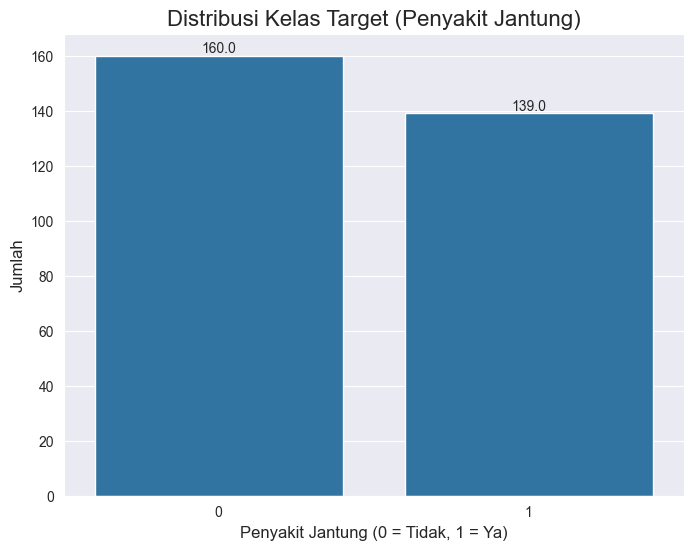

Insight: Dataset ini cukup seimbang (imbalanced-nya tidak separah dataset stroke). Ini kabar baik!


In [4]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df_cleaned)
plt.title('Distribusi Kelas Target (Penyakit Jantung)', fontsize=16)
plt.xlabel('Penyakit Jantung (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambahkan label angka
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()
print("Insight: Dataset ini cukup seimbang (imbalanced-nya tidak separah dataset stroke). Ini kabar baik!")

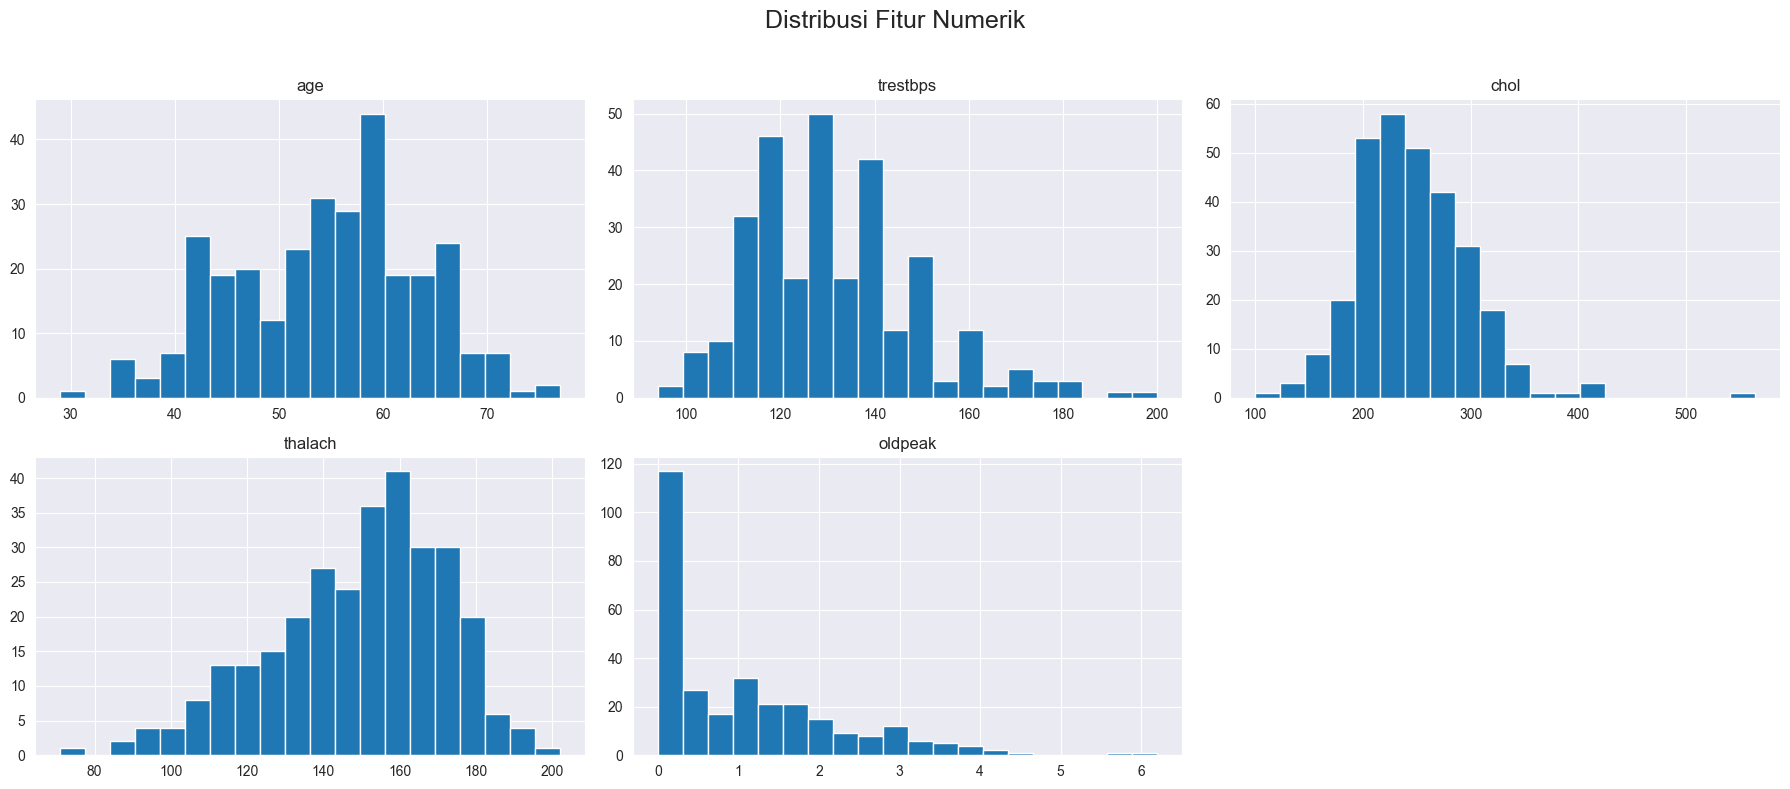

In [5]:
# Pilih kolom numerik untuk dianalisis
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_cleaned[numerical_features].hist(bins=20, figsize=(18, 8), layout=(2, 3))
plt.suptitle('Distribusi Fitur Numerik', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

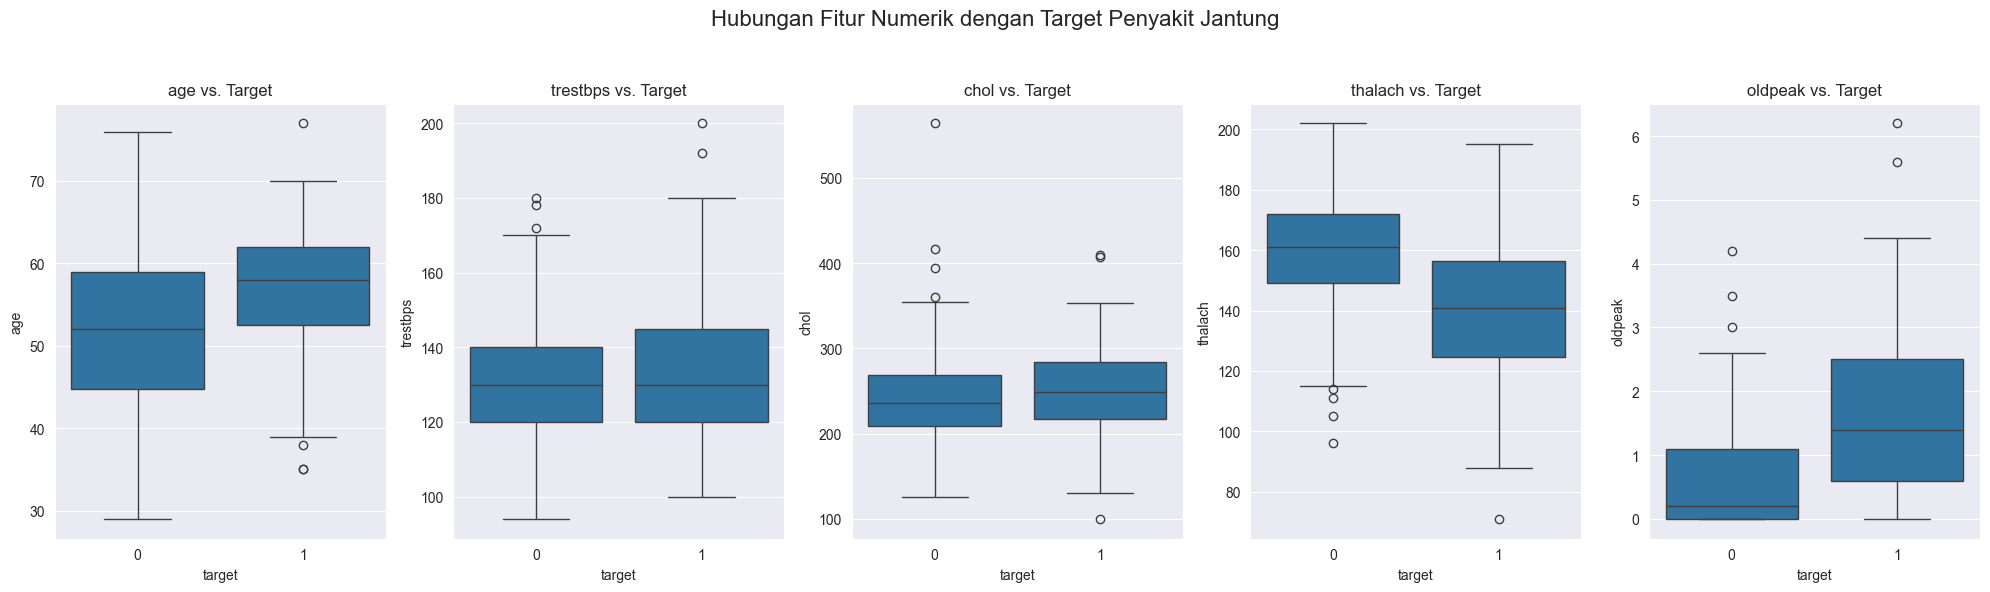

In [6]:
plt.figure(figsize=(20, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(x='target', y=col, data=df_cleaned)
    plt.title(f'{col} vs. Target', fontsize=12)

plt.suptitle('Hubungan Fitur Numerik dengan Target Penyakit Jantung', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

### 📊 Hubungan Fitur Kategorikal vs Target

Sekarang kita mau lihat bagaimana setiap kategori dalam fitur-fitur penting berhubungan dengan hasil akhir (punya penyakit jantung atau tidak). Ini akan membantu kita menjawab pertanyaan seperti:
- Apakah jenis kelamin tertentu lebih rentan?
- Tipe nyeri dada (`cp`) mana yang paling sering berujung pada diagnosis penyakit jantung?
- Apakah gula darah puasa (`fbs`) di atas 120 mg/dl berpengaruh?

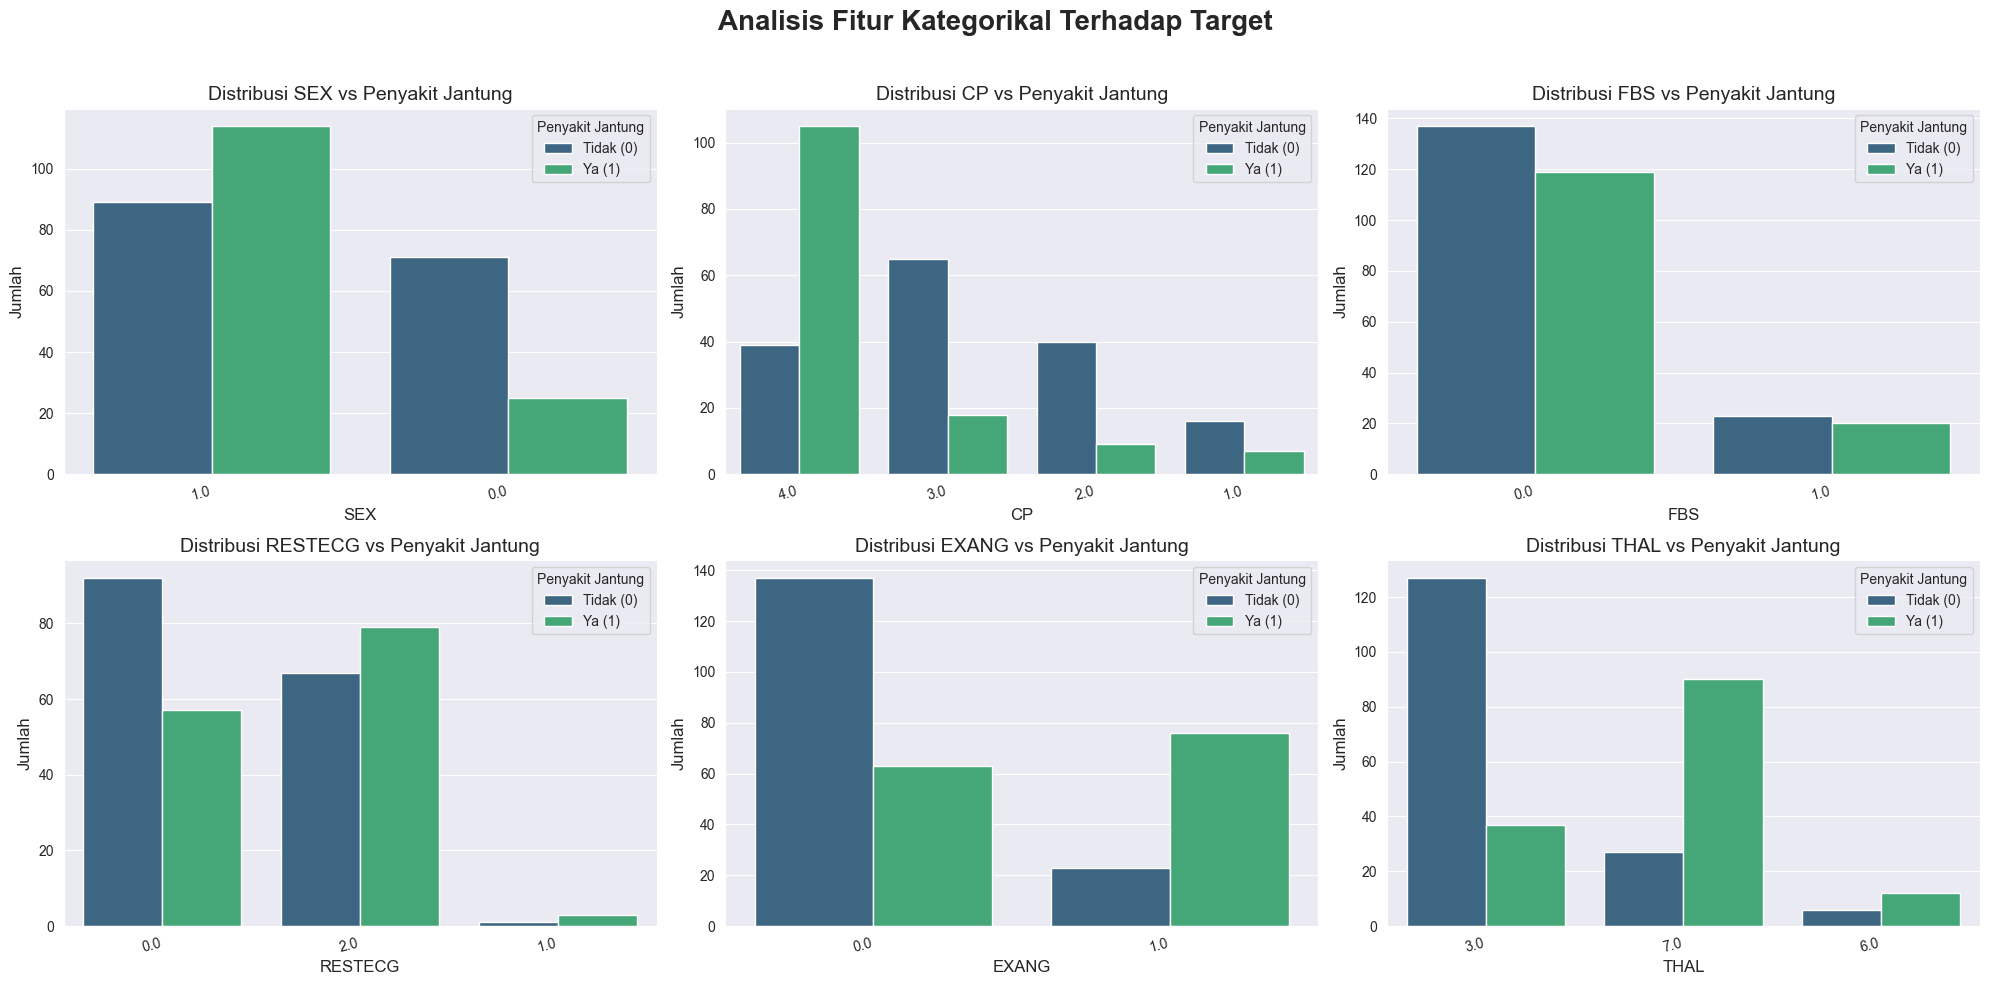

In [7]:
# Pilih fitur kategorikal yang paling relevan secara klinis
categorical_analysis_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_analysis_features):
    plt.subplot(2, 3, i + 1)
    # Gunakan 'hue' untuk memisahkan berdasarkan kolom 'target'
    sns.countplot(x=col, data=df_cleaned, hue='target', palette='viridis', order=df_cleaned[col].value_counts().index)
    plt.title(f'Distribusi {col.upper()} vs Penyakit Jantung', fontsize=14)
    plt.xlabel(col.upper(), fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=15, ha='right')
    plt.legend(title='Penyakit Jantung', labels=['Tidak (0)', 'Ya (1)'])

plt.suptitle('Analisis Fitur Kategorikal Terhadap Target', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 🔥 Heatmap Korelasi Antar Fitur

Terakhir, kita buat *heatmap* korelasi seperti sebelumnya. Ini cara paling cepat untuk melihat hubungan linear antar semua fitur numerik secara keseluruhan. Fitur yang punya warna mendekati merah tua atau biru tua dengan `target` adalah fitur yang paling berpengaruh.

**Catatan:** Untuk membuat heatmap, kita perlu mengubah beberapa fitur kategorikal yang sifatnya biner (seperti `sex`) menjadi angka (0 dan 1) terlebih dahulu.

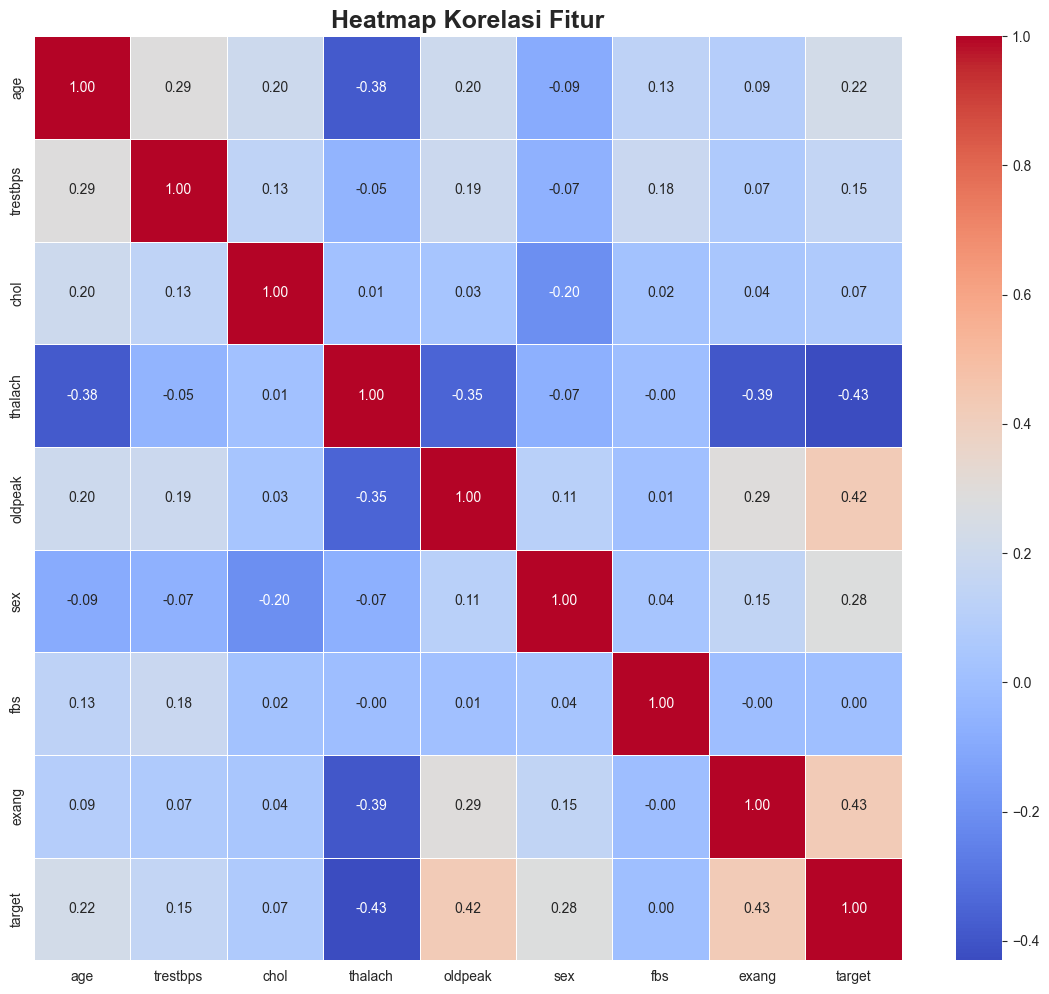

In [8]:
# Buat salinan dataframe agar tidak mengubah dataframe asli
df_corr = df_cleaned.copy()

# --- Encoding Manual untuk Korelasi ---
# Ubah beberapa kolom kategorikal menjadi numerik untuk diikutkan dalam korelasi
# 'sex' (0: Female, 1: Male) - Asumsi dari dataset aslinya, atau bisa dicek
# Jika di data lo Male/Female, sesuaikan. Di dataset UCI, 1=male; 0=female
# df_corr['sex'] = df_corr['sex'].map({'Male': 1, 'Female': 0}) # Jika formatnya string

# Fitur fbs dan exang biasanya sudah 0/1, jadi aman.

# Buat list semua fitur numerik + target untuk korelasi
correlation_features = numerical_features + ['sex', 'fbs', 'exang', 'target']

# Hitung matriks korelasi
correlation_matrix = df_corr[correlation_features].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Fitur', fontsize=18, weight='bold')
plt.show()

# 📝 5. Ringkasan & Insight Awal

Dari eksplorasi ini, kita mendapatkan beberapa temuan kunci.

In [9]:
# Membuat ringkasan akhir dalam bentuk print
print("===== 📝 Ringkasan Hasil EDA Penyakit Jantung =====")
print(f"\n1. **Ukuran Data:** Setelah penggabungan dan pembersihan, kita memiliki dataset bersih dengan {df_cleaned.shape[0]} baris dan {df_cleaned.shape[1]} kolom.")
print("\n2. **Keseimbangan Target:** Distribusi antara pasien 'Sakit' dan 'Tidak Sakit' cukup seimbang, sehingga metrik Akurasi masih bisa menjadi salah satu pertimbangan dalam evaluasi model.")
print("\n3. **Indikator Potensial:** Berdasarkan visualisasi box plot, fitur-fitur yang tampak sangat berpengaruh dalam membedakan pasien sakit dan sehat adalah:")
print("   - `thalach`: Pasien sakit cenderung memiliki detak jantung maksimal yang lebih rendah.")
print("   - `oldpeak`: Pasien sakit cenderung memiliki depresi ST yang lebih tinggi akibat olahraga.")
print("   - `cp` (tipe nyeri dada) dan `thal` (hasil tes thalium) juga kemungkinan besar menjadi prediktor kuat (perlu analisis lebih lanjut pada fitur kategorikal).")
print("\n4. **Kesiapan Data:** Data ini sekarang sudah bersih dan siap untuk tahap selanjutnya, yaitu `train_model_jantung.ipynb`.")

===== 📝 Ringkasan Hasil EDA Penyakit Jantung =====

1. **Ukuran Data:** Setelah penggabungan dan pembersihan, kita memiliki dataset bersih dengan 299 baris dan 14 kolom.

2. **Keseimbangan Target:** Distribusi antara pasien 'Sakit' dan 'Tidak Sakit' cukup seimbang, sehingga metrik Akurasi masih bisa menjadi salah satu pertimbangan dalam evaluasi model.

3. **Indikator Potensial:** Berdasarkan visualisasi box plot, fitur-fitur yang tampak sangat berpengaruh dalam membedakan pasien sakit dan sehat adalah:
   - `thalach`: Pasien sakit cenderung memiliki detak jantung maksimal yang lebih rendah.
   - `oldpeak`: Pasien sakit cenderung memiliki depresi ST yang lebih tinggi akibat olahraga.
   - `cp` (tipe nyeri dada) dan `thal` (hasil tes thalium) juga kemungkinan besar menjadi prediktor kuat (perlu analisis lebih lanjut pada fitur kategorikal).

4. **Kesiapan Data:** Data ini sekarang sudah bersih dan siap untuk tahap selanjutnya, yaitu `train_model_jantung.ipynb`.


# 💾 6. Simpan Data Bersih

Langkah terakhir di notebook ini! Kita akan menyimpan DataFrame `df_cleaned` yang sudah bersih ke dalam sebuah file CSV baru. File inilah yang akan menjadi sumber data utama untuk notebook *modeling* kita selanjutnya, `train_model_jantung.ipynb`.

In [10]:
# Tentukan nama file output
output_csv_path = 'data/df_cleaned_jantung.csv'

# Simpan DataFrame ke file CSV
# index=False agar nomor index dari DataFrame tidak ikut tersimpan sebagai kolom baru
df_cleaned.to_csv(output_csv_path, index=False)

print(f"✅ Data bersih berhasil disimpan di: '{output_csv_path}'")
print("\nSekarang, kita siap untuk melanjutkan ke tahap modeling!")

✅ Data bersih berhasil disimpan di: 'data/df_cleaned_jantung.csv'

Sekarang, kita siap untuk melanjutkan ke tahap modeling!
